#### Mariana Quiroga Londono 
#### FBM MNCs 

In [1]:
#SETTING ENVIRONMENT 

import rpy2
#import tzlocal
#%load_ext rpy2.ipython

import numpy as np
import pandas as pd
import scanpy as sc

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, dpi_save=1000)

/usr/local/lib/python3.7/dist-packages/numba/core/cpu.py:77: UserWarning: Numba extension module 'sparse._numba_extension' failed to load due to 'ModuleNotFoundError(No module named 'numba.targets')'.
  numba.core.entrypoints.init_all()


In [2]:
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list(name='gene_cmap', colors=['lightgrey', 'thistle', 'red', 'darkred']) 

In [3]:
#Read object and metadata
mrna_adata = sc.read("../Simone_data/fbm_mnc_citeseq_rna_pp_clus_20201208.h5ad")
labels = pd.read_csv("../Simone_data/fbm_mnc_meta_with_annot_20201208.csv",index_col="Unnamed: 0")
mrna_adata.obs["cell.labels"] = labels["cell.labels"]
cell_names = [x[:-2] for x in mrna_adata.obs_names]
mrna_adata.obs_names = cell_names
mrna_adata.obs

/usr/local/lib/python3.7/dist-packages/anndata/compat/__init__.py:161: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/anndata/compat/__init__.py:161: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  FutureWarning,


,souporcell_doublet,souporcell_assignment,orig.ident,lanes,sequencing.type,sex,mad_prd,auto_prd,is_doublet,nUMI,nGene,percent.mito,nUMI_protein,nAb,leiden,__is_in_cluster__,cell.labels
AAACCCAAGAGCATAT,singlet,1,sample_2,SIGAH2_SIGAH12,3prime,male,False,False,False,8763.0,2712,0.013580,414.0,83,10,False,pre B progenitor
AAACCCAAGGACTGGT,singlet,1,sample_2,SIGAH2_SIGAH12,3prime,male,False,False,False,44958.0,4893,0.028739,1452.0,93,1,False,early erythroid
AAACCCAAGGTCATAA,singlet,1,sample_2,SIGAH2_SIGAH12,3prime,male,False,False,False,41561.0,4971,0.021294,1430.0,94,1,False,early erythroid
AAACCCACAAGCGAAC,singlet,1,sample_2,SIGAH2_SIGAH12,3prime,male,False,False,False,14068.0,3244,0.012511,266.0,87,12,False,pre B progenitor
AAACCCACAATCTCTT,singlet,0,sample_1,SIGAH2_SIGAH12,3prime,female,False,False,False,5477.0,2267,0.015154,374.0,81,18,False,pre pro B progenitor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGCAGTCAGCC,singlet,1,sample_2,SIGAH2_SIGAH12,3prime,male,False,False,False,17406.0,3492,0.019419,968.0,136,9,False,MOP
TTTGTTGCATCCTAAG,singlet,1,sample_2,SIGAH2_SIGAH12,3prime,male,False,False,False,21899.0,4560,0.037216,1040.0,139,7,False,promonocyte
TTTGTTGCATGAGATA,singlet,1,sample_2,SIGAH2_SIGAH12,3prime,male,False,False,False,16615.0,2236,0.007704,272.0,76,19,False,mid erythroid
TTTGTTGTCAAATGAG,singlet,1,sample_2,SIGAH2_SIGAH12,3prime,male,False,False,False,10972.0,2582,0.033722,430.0,109,0,False,CD14 monocyte


... storing 'cell.labels' as categorical


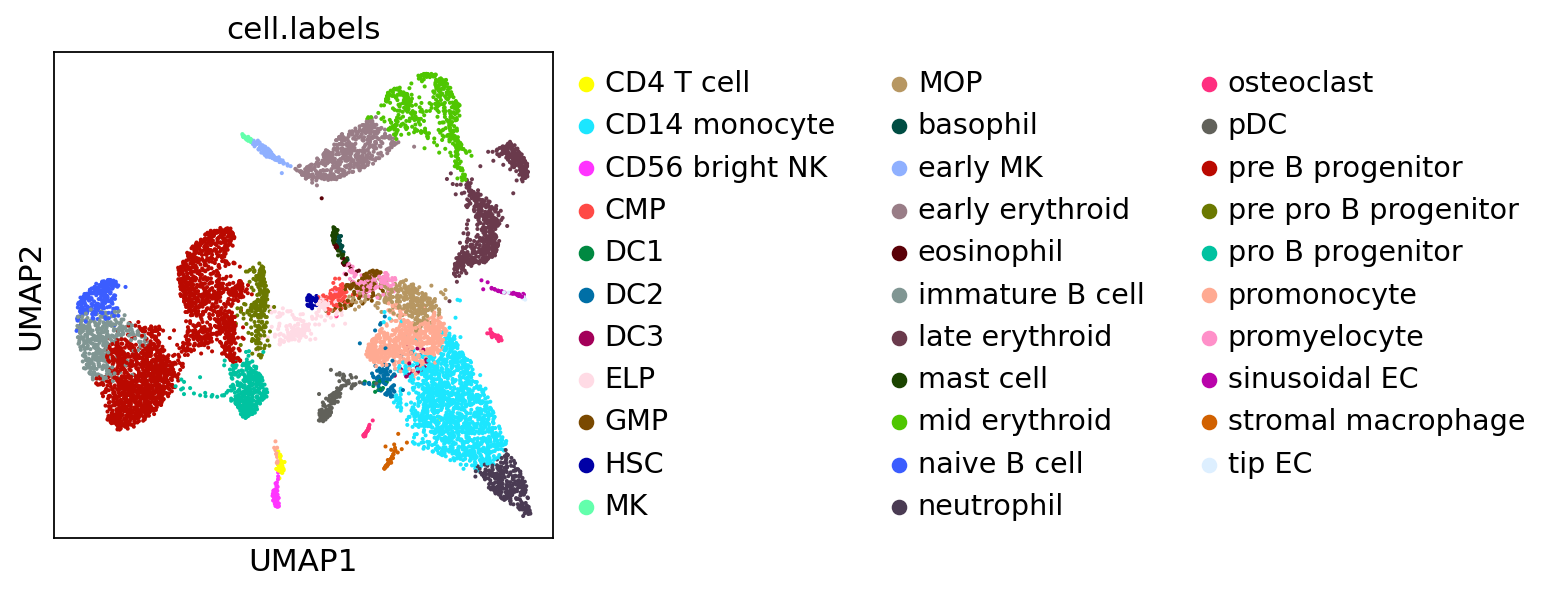

In [4]:
sc.pl.umap(mrna_adata,color=["cell.labels"], ncols=5, cmap=cmap)

In [5]:
mrna_adata

AnnData object with n_obs × n_vars = 8986 × 36601
    obs: 'souporcell_doublet', 'souporcell_assignment', 'orig.ident', 'lanes', 'sequencing.type', 'sex', 'mad_prd', 'auto_prd', 'is_doublet', 'nUMI', 'nGene', 'percent.mito', 'nUMI_protein', 'nAb', 'leiden', '__is_in_cluster__', 'cell.labels'
    var: 'gene_ids', 'feature_types', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'leiden', 'leiden_colors', 'neighbors', 'orig.ident_colors', 'pca', 'rank_genes_groups', 'rank_genes_groups_filtered', 'cell.labels_colors'
    obsm: 'X_orig_pca', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [6]:
DSB_output0=sc.read("../010221_mq224_postQC_postDSB_postUMAP_celllabels_MNCs_ADTonmRNA_xSimone.h5ad")

In [7]:
np.min(DSB_output0.X)

-4.5196896

In [8]:
DSB_output0.X = np.where(DSB_output0.X < 0, 0, DSB_output0.X)

In [9]:
ab1 = pd.DataFrame(DSB_output0[:,"CD34"].X.toarray(), columns=['CD34'],index=DSB_output0.obs_names)
ab1["CD117"] = DSB_output0[:,"CD117"].X.toarray()
ab1

,CD34,CD117
AAACCCAAGAGCATAT,0.835890,0.000000
AAACCCAAGGACTGGT,0.000000,7.959861
AAACCCAAGGTCATAA,0.835890,13.821937
AAACCCACAAGCGAAC,0.000000,1.256280
AAACCCACAATCTCTT,10.898800,0.000000
...,...,...
TTTGTTGCAGTCAGCC,2.029783,0.000000
TTTGTTGCATCCTAAG,3.063979,1.256280
TTTGTTGCATGAGATA,0.000000,0.000000
TTTGTTGTCAAATGAG,0.000000,0.000000


In [10]:
#ab1.to_csv("20210415_FBM_MNC_CD34_vs_CD117.csv")

In [11]:
pwd

'/rds/project/rds-SDzz0CATGms/users/mq224/HCA_project/BM/Stage3_demultiplexing/ADT/Xiaonan_test_FBM3_MNCs/20210426_R3_figures'

<AxesSubplot:xlabel='CD34', ylabel='CD117'>

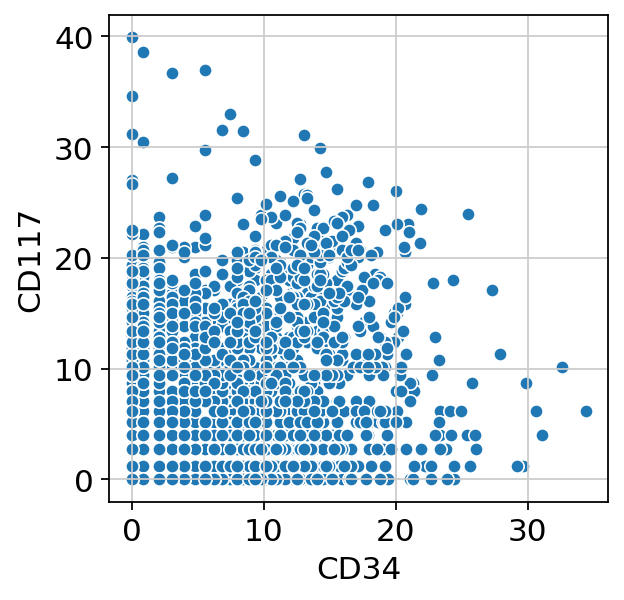

In [12]:
import seaborn as sns
sns.scatterplot(data=ab1, x=ab1["CD34"], y=ab1["CD117"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:437: UserWarning: The following kwargs were not used by contour: 'fill'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


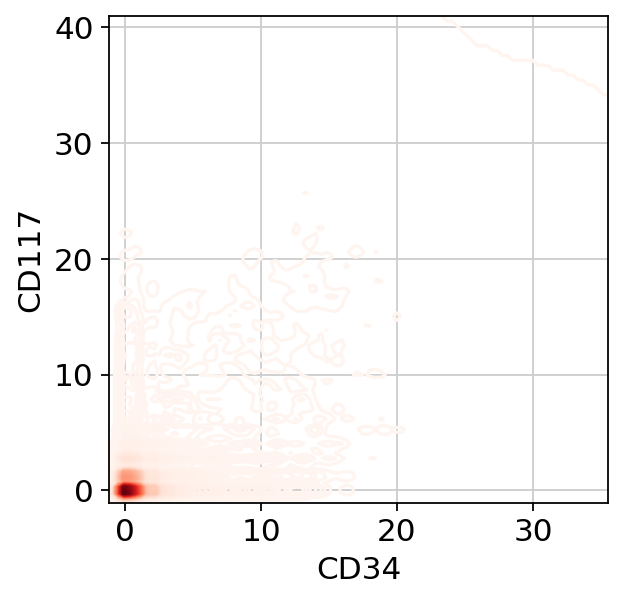

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(ab1["CD34"], ab1["CD117"], cmap="Reds", fill=True, levels=1000)
plt.show()

In [14]:
# Density plot in log

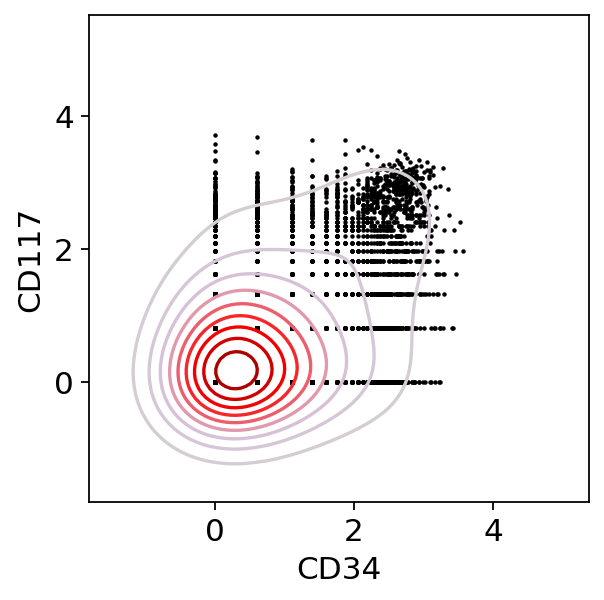

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
p1 = 'CD34'
p2 = 'CD117'

abs_pd1 = abs(np.min(DSB_output0[:,p1].X.toarray()))
abs_pd2 = abs(np.min(DSB_output0[:,p2].X.toarray()))

fig, ax = plt.subplots()
ax.scatter(np.log1p(DSB_output0[:,p1].X.toarray()+abs_pd1), np.log1p(DSB_output0[:,p2].X.toarray()+abs_pd2), s=1,color='black')
sns.kdeplot(np.log1p(DSB_output0[:,p1].X.toarray().flatten()+abs_pd1), np.log1p(DSB_output0[:,p2].X.toarray().flatten()+abs_pd2), bw=0.6, cmap=cmap,ax=ax)
ax.set_xlabel(p1)
ax.set_ylabel(p2)
ax.grid(False)
plt.savefig('20210430_FBM-MNC_CD117_CD34_densityplot.pdf')

In [16]:
# Density plot without log

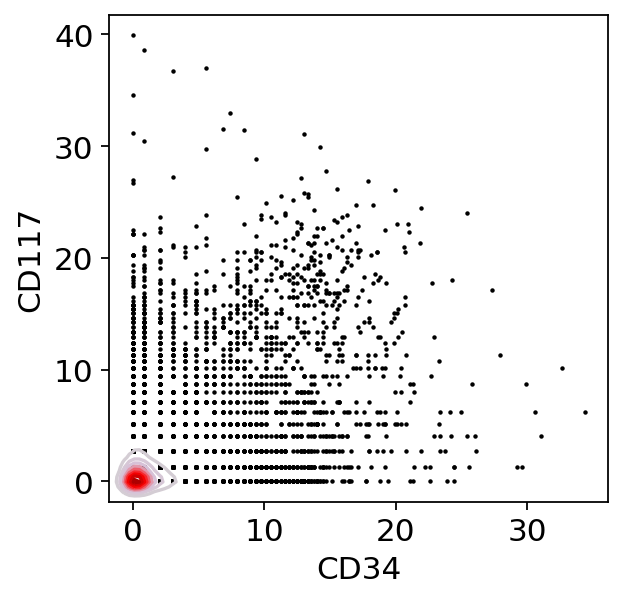

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
p1 = 'CD34'
p2 = 'CD117'

abs_pd1 = abs(np.min(DSB_output0[:,p1].X.toarray()))
abs_pd2 = abs(np.min(DSB_output0[:,p2].X.toarray()))

fig, ax = plt.subplots()
ax.scatter(DSB_output0[:,p1].X.toarray()+abs_pd1, DSB_output0[:,p2].X.toarray()+abs_pd2, s=1,color='black')
sns.kdeplot(DSB_output0[:,p1].X.toarray().flatten()+abs_pd1, DSB_output0[:,p2].X.toarray().flatten()+abs_pd2, bw=0.6, cmap=cmap,ax=ax)
ax.set_xlabel(p1)
ax.set_ylabel(p2)
ax.grid(False)


the number of cells when we divide the plot into 4 quadrants,
with the dividing lines going through at 2 on the X-axis, and 2 on the Y axis.
Essentially, I want to get numbers of cells that are double negative, 
single positive for either marker, and double positive for both markers. 

In [18]:
DSB_output0

AnnData object with n_obs × n_vars = 8978 × 198
    obs: 'leiden', 'louvain', 'assignment', 'cell.labels'
    var: 'bg_mean'
    uns: 'assignment_colors', 'draw_graph', 'leiden', 'leiden_colors', 'louvain', 'neighbors', 'pca', 'umap'
    obsm: 'X_draw_graph_fa', 'X_pca', 'X_umap', 'umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [19]:
#CD34+CD117+
CD34p_CD117p = DSB_output0.copy()
idx1 = (DSB_output0[:,'CD34'].X>7) & (DSB_output0[:,'CD117'].X>7)
CD34p_CD117p=CD34p_CD117p[idx1]
print(CD34p_CD117p)

View of AnnData object with n_obs × n_vars = 542 × 198
    obs: 'leiden', 'louvain', 'assignment', 'cell.labels'
    var: 'bg_mean'
    uns: 'assignment_colors', 'draw_graph', 'leiden', 'louvain', 'neighbors', 'pca', 'umap'
    obsm: 'X_draw_graph_fa', 'X_pca', 'X_umap', 'umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


In [20]:
#CD34+CD117-
CD34p_CD117n = DSB_output0.copy()
idx2 = (DSB_output0[:,'CD34'].X>7) & (DSB_output0[:,'CD117'].X<7)
CD34p_CD117n=CD34p_CD117n[idx2]
print(CD34p_CD117n)

View of AnnData object with n_obs × n_vars = 667 × 198
    obs: 'leiden', 'louvain', 'assignment', 'cell.labels'
    var: 'bg_mean'
    uns: 'assignment_colors', 'draw_graph', 'leiden', 'louvain', 'neighbors', 'pca', 'umap'
    obsm: 'X_draw_graph_fa', 'X_pca', 'X_umap', 'umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


In [21]:
#CD34-CD117+
CD34n_CD117p = DSB_output0.copy()
idx3 = (DSB_output0[:,'CD34'].X<7) & (DSB_output0[:,'CD117'].X>7)
CD34n_CD117p=CD34n_CD117p[idx3]
print(CD34n_CD117p)

View of AnnData object with n_obs × n_vars = 616 × 198
    obs: 'leiden', 'louvain', 'assignment', 'cell.labels'
    var: 'bg_mean'
    uns: 'assignment_colors', 'draw_graph', 'leiden', 'louvain', 'neighbors', 'pca', 'umap'
    obsm: 'X_draw_graph_fa', 'X_pca', 'X_umap', 'umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


In [22]:
#CD34-CD117-
CD34n_CD117n = DSB_output0.copy()
idx4 = (DSB_output0[:,'CD34'].X<7) & (DSB_output0[:,'CD117'].X<7)
CD34n_CD117n=CD34n_CD117n[idx4]
print(CD34n_CD117n)

View of AnnData object with n_obs × n_vars = 7153 × 198
    obs: 'leiden', 'louvain', 'assignment', 'cell.labels'
    var: 'bg_mean'
    uns: 'assignment_colors', 'draw_graph', 'leiden', 'louvain', 'neighbors', 'pca', 'umap'
    obsm: 'X_draw_graph_fa', 'X_pca', 'X_umap', 'umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


In [23]:
#CD34
CD34 = DSB_output0.copy()
idx5 = (DSB_output0[:,'CD34'].X>7)
CD34=CD34[idx5]
print(CD34)

View of AnnData object with n_obs × n_vars = 1209 × 198
    obs: 'leiden', 'louvain', 'assignment', 'cell.labels'
    var: 'bg_mean'
    uns: 'assignment_colors', 'draw_graph', 'leiden', 'louvain', 'neighbors', 'pca', 'umap'
    obsm: 'X_draw_graph_fa', 'X_pca', 'X_umap', 'umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


In [24]:
#CD117
CD117 = DSB_output0.copy()
idx6 = (DSB_output0[:,'CD117'].X>7)
CD117=CD117[idx6]
print(CD117)

View of AnnData object with n_obs × n_vars = 1158 × 198
    obs: 'leiden', 'louvain', 'assignment', 'cell.labels'
    var: 'bg_mean'
    uns: 'assignment_colors', 'draw_graph', 'leiden', 'louvain', 'neighbors', 'pca', 'umap'
    obsm: 'X_draw_graph_fa', 'X_pca', 'X_umap', 'umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


In [25]:
CD34.shape[0]

1209

In [26]:
print("Total number of cells = "+ str(DSB_output0.shape[0]))
print("Total number of CD34+ cells = "+ str(CD34.shape[0]))
print("Total number of CD117+ cells = "+ str(CD117.shape[0]))
print("CD34+CD117+ = "+str(CD34p_CD117p.shape[0]))
print("CD34+CD117- = "+str(CD34p_CD117n.shape[0]))
print("CD34-CD117+ = "+str(CD34n_CD117p.shape[0]))
print("CD34-CD117- = "+str(CD34n_CD117n.shape[0]))


Total number of cells = 8978
Total number of CD34+ cells = 1209
Total number of CD117+ cells = 1158
CD34+CD117+ = 542
CD34+CD117- = 667
CD34-CD117+ = 616
CD34-CD117- = 7153


To begin with, can you do a CD34/CD38 plot in the same way you did the CD34/CD117 plot; 
and please plot it both with the actual numbers, and also log transformed. 

In [27]:
np.min(DSB_output0.X)

0.0

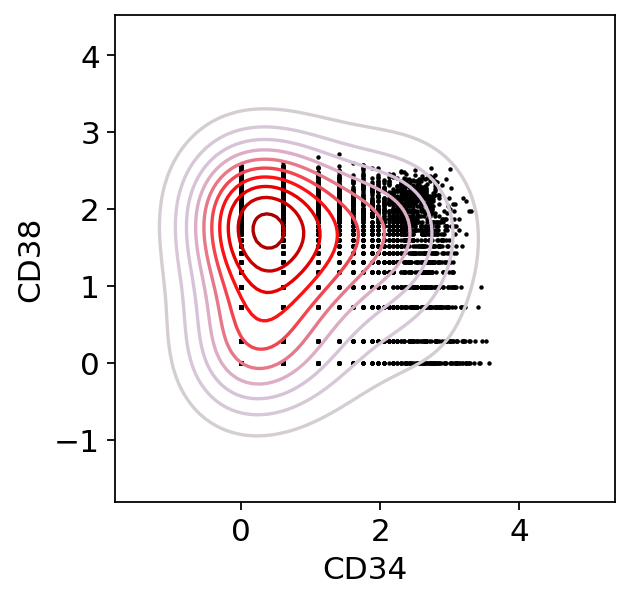

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
p1 = 'CD34'
p2 = 'CD38'

abs_pd1 = abs(np.min(DSB_output0[:,p1].X.toarray()))
abs_pd2 = abs(np.min(DSB_output0[:,p2].X.toarray()))

fig, ax = plt.subplots()
ax.scatter(np.log1p(DSB_output0[:,p1].X.toarray()+abs_pd1), np.log1p(DSB_output0[:,p2].X.toarray()+abs_pd2), s=1,color='black')
sns.kdeplot(np.log1p(DSB_output0[:,p1].X.toarray().flatten()+abs_pd1), np.log1p(DSB_output0[:,p2].X.toarray().flatten()+abs_pd2), bw=0.6, cmap=cmap,ax=ax)
ax.set_xlabel(p1)
ax.set_ylabel(p2)
ax.grid(False)
plt.savefig('20210430_FBM-MNC_CD38_CD34_densityplot.pdf')

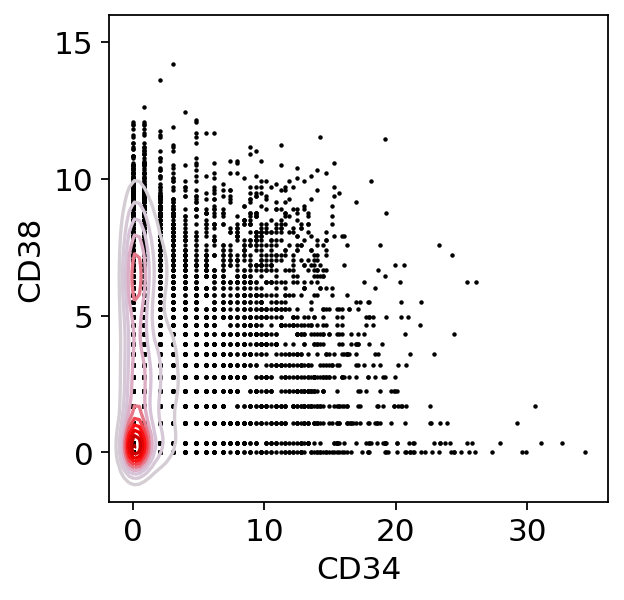

In [29]:
#Density plot without log

import matplotlib.pyplot as plt
import seaborn as sns
p1 = 'CD34'
p2 = 'CD38'

abs_pd1 = abs(np.min(DSB_output0[:,p1].X.toarray()))
abs_pd2 = abs(np.min(DSB_output0[:,p2].X.toarray()))

fig, ax = plt.subplots()
ax.scatter(DSB_output0[:,p1].X.toarray()+abs_pd1, DSB_output0[:,p2].X.toarray()+abs_pd2, s=1,color='black')
sns.kdeplot(DSB_output0[:,p1].X.toarray().flatten()+abs_pd1, DSB_output0[:,p2].X.toarray().flatten()+abs_pd2, bw=0.6, cmap=cmap,ax=ax)
ax.set_xlabel(p1)
ax.set_ylabel(p2)
ax.grid(False)

In [30]:
##CD34+CD117+CD38-
#CD34+CD117+CD38+
#CD34+CD117-CD38+
#CD34-CD117+CD38+
#CD34-CD117-CD38+

In [31]:
#CD34+CD117+CD38-
CD34p_CD117p_CD38n= CD34p_CD117p.copy()
idx_extra = CD34p_CD117p_CD38n[:,'CD38'].X<2.7
CD34p_CD117p_CD38n=CD34p_CD117p_CD38n[idx_extra]
print(CD34p_CD117p_CD38n)

View of AnnData object with n_obs × n_vars = 264 × 198
    obs: 'leiden', 'louvain', 'assignment', 'cell.labels'
    var: 'bg_mean'
    uns: 'assignment_colors', 'draw_graph', 'leiden', 'louvain', 'neighbors', 'pca', 'umap'
    obsm: 'X_draw_graph_fa', 'X_pca', 'X_umap', 'umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


In [32]:
#CD34+CD117+CD38+
CD34p_CD117p_CD38p= CD34p_CD117p.copy()
idx7 = CD34p_CD117p_CD38p[:,'CD38'].X>2.7
CD34p_CD117p_CD38p=CD34p_CD117p_CD38p[idx7]
print(CD34p_CD117p_CD38p)

View of AnnData object with n_obs × n_vars = 278 × 198
    obs: 'leiden', 'louvain', 'assignment', 'cell.labels'
    var: 'bg_mean'
    uns: 'assignment_colors', 'draw_graph', 'leiden', 'louvain', 'neighbors', 'pca', 'umap'
    obsm: 'X_draw_graph_fa', 'X_pca', 'X_umap', 'umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


In [33]:
#CD34+CD117-CD38+

CD34p_CD117n_CD38p= CD34p_CD117n.copy()
idx8 = CD34p_CD117n_CD38p[:,'CD38'].X>2.7
CD34p_CD117n_CD38p=CD34p_CD117n_CD38p[idx8]
print(CD34p_CD117n_CD38p)

View of AnnData object with n_obs × n_vars = 536 × 198
    obs: 'leiden', 'louvain', 'assignment', 'cell.labels'
    var: 'bg_mean'
    uns: 'assignment_colors', 'draw_graph', 'leiden', 'louvain', 'neighbors', 'pca', 'umap'
    obsm: 'X_draw_graph_fa', 'X_pca', 'X_umap', 'umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


In [34]:
#CD34-CD117+CD38+

CD34n_CD117p_CD38p = CD34n_CD117p.copy()
idx9 = CD34n_CD117p_CD38p[:,'CD38'].X>2.7
CD34n_CD117p_CD38p=CD34n_CD117p_CD38p[idx9]
print(CD34n_CD117p_CD38p)

View of AnnData object with n_obs × n_vars = 181 × 198
    obs: 'leiden', 'louvain', 'assignment', 'cell.labels'
    var: 'bg_mean'
    uns: 'assignment_colors', 'draw_graph', 'leiden', 'louvain', 'neighbors', 'pca', 'umap'
    obsm: 'X_draw_graph_fa', 'X_pca', 'X_umap', 'umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


In [35]:
#CD34-CD117-CD38+

CD34n_CD117n_CD38p = CD34n_CD117n.copy()
idx10 = CD34n_CD117n_CD38p[:,'CD38'].X>2.7
CD34n_CD117n_CD38p=CD34n_CD117n_CD38p[idx10]
print(CD34n_CD117n_CD38p)

View of AnnData object with n_obs × n_vars = 4480 × 198
    obs: 'leiden', 'louvain', 'assignment', 'cell.labels'
    var: 'bg_mean'
    uns: 'assignment_colors', 'draw_graph', 'leiden', 'louvain', 'neighbors', 'pca', 'umap'
    obsm: 'X_draw_graph_fa', 'X_pca', 'X_umap', 'umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


In [36]:
CD38 = DSB_output0.copy()
idx11 = (DSB_output0[:,'CD38'].X>2.7)
CD38=CD38[idx11]
print(CD38)

View of AnnData object with n_obs × n_vars = 5475 × 198
    obs: 'leiden', 'louvain', 'assignment', 'cell.labels'
    var: 'bg_mean'
    uns: 'assignment_colors', 'draw_graph', 'leiden', 'louvain', 'neighbors', 'pca', 'umap'
    obsm: 'X_draw_graph_fa', 'X_pca', 'X_umap', 'umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


In [37]:
print("Total number of cells = "+ str(DSB_output0.shape[0]))
print("Total number of CD34+ cells = "+ str(CD34.shape[0]))
print("Total number of CD117+ cells = "+ str(CD117.shape[0]))
print("Total number of CD38+ cells = "+ str(CD38.shape[0]))



print("CD34+CD117+CD38- = "+str(CD34p_CD117p_CD38n.shape[0]))
print("CD34+CD117+CD38+ = "+str(CD34p_CD117p_CD38p.shape[0]))
print("CD34+CD117-CD38+ = "+str(CD34p_CD117n_CD38p.shape[0]))
print("CD34-CD117+CD38+ = "+str(CD34n_CD117p_CD38p.shape[0]))
print("CD34-CD117-CD38+ = "+str(CD34n_CD117n_CD38p.shape[0]))


Total number of cells = 8978
Total number of CD34+ cells = 1209
Total number of CD117+ cells = 1158
Total number of CD38+ cells = 5475
CD34+CD117+CD38- = 264
CD34+CD117+CD38+ = 278
CD34+CD117-CD38+ = 536
CD34-CD117+CD38+ = 181
CD34-CD117-CD38+ = 4480


In [38]:
#CD34+CD38+
#CD34+CD38-
#CD34-CD38+
#CD34-CD38-

In [39]:
#CD34+CD38+
CD34p_CD38p = DSB_output0.copy()
idx1 = (DSB_output0[:,'CD34'].X>7) & (DSB_output0[:,'CD38'].X>2.7)
CD34p_CD38p=CD34p_CD38p[idx1]
print(CD34p_CD38p)

View of AnnData object with n_obs × n_vars = 814 × 198
    obs: 'leiden', 'louvain', 'assignment', 'cell.labels'
    var: 'bg_mean'
    uns: 'assignment_colors', 'draw_graph', 'leiden', 'louvain', 'neighbors', 'pca', 'umap'
    obsm: 'X_draw_graph_fa', 'X_pca', 'X_umap', 'umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


In [40]:
#CD34+CD38-
CD34p_CD38n = DSB_output0.copy()
idx2 = (DSB_output0[:,'CD34'].X>7) & (DSB_output0[:,'CD38'].X<2.7)
CD34p_CD38n=CD34p_CD38n[idx2]
print(CD34p_CD38n)

View of AnnData object with n_obs × n_vars = 395 × 198
    obs: 'leiden', 'louvain', 'assignment', 'cell.labels'
    var: 'bg_mean'
    uns: 'assignment_colors', 'draw_graph', 'leiden', 'louvain', 'neighbors', 'pca', 'umap'
    obsm: 'X_draw_graph_fa', 'X_pca', 'X_umap', 'umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


In [41]:
#CD34-CD38+
CD34n_CD38p = DSB_output0.copy()
idx3 = (DSB_output0[:,'CD34'].X<7) & (DSB_output0[:,'CD38'].X>2.7)
CD34n_CD38p=CD34n_CD38p[idx3]
print(CD34n_CD38p)

View of AnnData object with n_obs × n_vars = 4661 × 198
    obs: 'leiden', 'louvain', 'assignment', 'cell.labels'
    var: 'bg_mean'
    uns: 'assignment_colors', 'draw_graph', 'leiden', 'louvain', 'neighbors', 'pca', 'umap'
    obsm: 'X_draw_graph_fa', 'X_pca', 'X_umap', 'umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


In [42]:
#CD34-CD38-
CD34n_CD38n = DSB_output0.copy()
idx4 = (DSB_output0[:,'CD34'].X<7) & (DSB_output0[:,'CD38'].X<2.7)
CD34n_CD38n=CD34n_CD38n[idx4]
print(CD34n_CD38n)

View of AnnData object with n_obs × n_vars = 3108 × 198
    obs: 'leiden', 'louvain', 'assignment', 'cell.labels'
    var: 'bg_mean'
    uns: 'assignment_colors', 'draw_graph', 'leiden', 'louvain', 'neighbors', 'pca', 'umap'
    obsm: 'X_draw_graph_fa', 'X_pca', 'X_umap', 'umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


In [43]:
print("Total number of cells = "+ str(DSB_output0.shape[0]))
print("Total number of CD34+ cells = "+ str(CD34.shape[0]))
print("Total number of CD38+ cells = "+ str(CD38.shape[0]))
print("CD34+CD38+ = "+str(CD34p_CD38p.shape[0]))
print("CD34+CD38- = "+str(CD34p_CD38n.shape[0]))
print("CD34-CD38+ = "+str(CD34n_CD38p.shape[0]))
print("CD34-CD38- = "+str(CD34n_CD38n.shape[0]))

Total number of cells = 8978
Total number of CD34+ cells = 1209
Total number of CD38+ cells = 5475
CD34+CD38+ = 814
CD34+CD38- = 395
CD34-CD38+ = 4661
CD34-CD38- = 3108


In [44]:
pwd

'/rds/project/rds-SDzz0CATGms/users/mq224/HCA_project/BM/Stage3_demultiplexing/ADT/Xiaonan_test_FBM3_MNCs/20210426_R3_figures'